# Stage 3: Python Fundamentals

## NUMPY: NUMERICAL LOADING

In [1]:
# NumPy - Python Library for numerical computing
import numpy as np

In [2]:
# SYNTAX FOR ARRANGE
# np.arange(stop): This function generates an array of numbers starting from 0 and incrementing by 1,
# up to (but not including) the stop value. It's a convenient, highly optimized way to create a sequential array.
# numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
# SYNTAX FOR ARRAY
# np.array([list]): This function takes an existing Python list or other array-like object and converts it into a NumPy
# array. You have to manually type out all the elements.

my_array = np.arange(1000000)
print(my_array)

[     0      1      2 ... 999997 999998 999999]


In [3]:
# Only stop
a = np.arange(5)
# → [0 1 2 3 4]
print(a)

# Start and stop
a = np.arange(2, 7)
# → [2 3 4 5 6]
print(a)

# Start, stop, step
a = np.arange(0, 10, 2)
# → [0 2 4 6 8]
print(a)

# With float step
a = np.arange(1.0, 2.0, 0.2)
# → [1.  1.2  1.4  1.6  1.8]
print(a)

# With dtype
a = np.arange(0, 5, dtype=float)
# → [0. 1. 2. 3. 4.]
print(a)

[0 1 2 3 4]
[2 3 4 5 6]
[0 2 4 6 8]
[1.  1.2 1.4 1.6 1.8]
[0. 1. 2. 3. 4.]


In [4]:
# 1D → 2D (rows × cols)
# USING RESHAPE FOR DIMENSIONS
arr_2d = np.arange(12).reshape(3, 4) 
print("ARRAY: ")
print(arr_2d)
print("DIMENSIONS: ", arr_2d.shape)


ARRAY: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
DIMENSIONS:  (3, 4)


In [5]:
# VECTORIZATION
# Multiplies every values in the array with 2
vectorized_result = my_array * 2
print(vectorized_result)
arr_2d *= 2
print(arr_2d)

[      0       2       4 ... 1999994 1999996 1999998]
[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]


In [6]:
# VECTORIZATION VS LOOPING
# LOOPING IS MORE LENGTHY SYNTAX 

# Compare Performance: Use the %%timeit magic command in Jupyter to show the difference. 
# You will see the vectorized version is orders of magnitude faster.

loop_result = []
for x in my_array:
    loop_result.append(x * 2)

In [7]:
%%timeit
my_array * 2

540 μs ± 32.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%%timeit
loop_result = [x * 2 for x in my_array]

37.2 ms ± 326 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## DATASET LOADING & MANIPULATION/DATA FRAMES: PANDAS 

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('../data/starter_data.csv')

In [11]:
print(df)

   id category  value  profit   market_cap
0   1     Tech   23.5     1.2  12000000000
1   2  Finance   15.8    -0.5   8500000000
2   3     Tech   45.2     3.1  15500000000
3   4   Energy   10.1     0.2   4200000000
4   5  Finance   12.7    -0.1   7800000000
5   6     Tech   30.4     1.8  14300000000
6   7   Energy   18.9     0.7   5100000000
7   8     Tech   55.6     4.5  18800000000
8   9  Finance   20.0     0.4   9200000000
9  10   Energy    8.5    -0.3   3700000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10 non-null     int64  
 1   category    10 non-null     object 
 2   value       10 non-null     float64
 3   profit      10 non-null     float64
 4   market_cap  10 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 532.0+ bytes


In [13]:
df.head()

,id,category,value,profit,market_cap
0,1,Tech,23.5,1.2,12000000000
1,2,Finance,15.8,-0.5,8500000000
2,3,Tech,45.2,3.1,15500000000
3,4,Energy,10.1,0.2,4200000000
4,5,Finance,12.7,-0.1,7800000000


### EXPLORATORY DATA ANALYSIS USING PANDAS AND NUMPY

In [14]:
# .describe() give you a quick look at the central tendency, dispersion, and shape of your data's distribution,
# helping you spot potential issues like outliers or missing values
summary_stats = df.describe()
print(summary_stats)

             id      value     profit    market_cap
count  10.00000  10.000000  10.000000  1.000000e+01
mean    5.50000  24.070000   1.100000  9.910000e+09
std     3.02765  15.490359   1.615206  5.111740e+09
min     1.00000   8.500000  -0.500000  3.700000e+09
25%     3.25000  13.475000  -0.025000  5.775000e+09
50%     5.50000  19.450000   0.550000  8.850000e+09
75%     7.75000  28.675000   1.650000  1.372500e+10
max    10.00000  55.600000   4.500000  1.880000e+10


In [15]:

# throws an error because there are strings in category column which cannot be used to compute mean
# grouped_data = df.groupby('profit').mean()
# print(grouped_data)

# Group by 'profit', then calculate the mean of 'market_cap'
grouped_data = df.groupby('profit')['market_cap'].mean()
print(grouped_data)

# OR, group by 'category' and calculate the mean of 'profit' and 'market_cap'
grouped_data_by_category = df.groupby('category')[['profit', 'market_cap']].mean()
print(grouped_data_by_category)

profit
-0.5    8.500000e+09
-0.3    3.700000e+09
-0.1    7.800000e+09
 0.2    4.200000e+09
 0.4    9.200000e+09
 0.7    5.100000e+09
 1.2    1.200000e+10
 1.8    1.430000e+10
 3.1    1.550000e+10
 4.5    1.880000e+10
Name: market_cap, dtype: float64
            profit    market_cap
category                        
Energy    0.200000  4.333333e+09
Finance  -0.066667  8.500000e+09
Tech      2.650000  1.515000e+10


In [16]:
# First, make sure the directory exists
import os
os.makedirs('../data/processed', exist_ok=True)

# Save the DataFrame to a CSV file
summary_stats.to_csv('../data/processed/summary.csv')

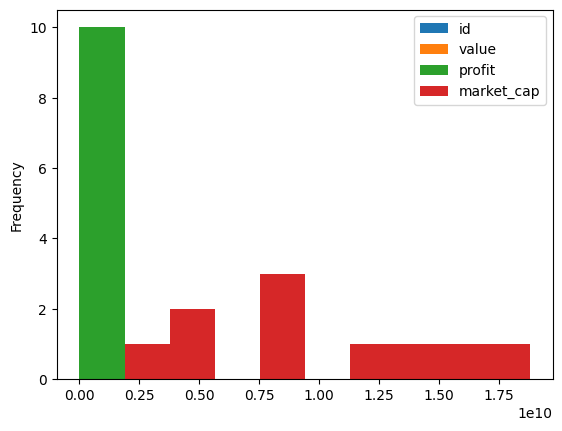

In [17]:
import matplotlib.pyplot as plt

# Example plot
df.plot(kind='hist')

# Save the plot
plt.savefig('../docs/summary_plot.png')

### UTILS & REUSABILITY - SANITY CHECK HERE

In [18]:
import sys # for interacting with the python interpreter
import os # for creating directories 

In [19]:
# Getting the path to the parent directory (project root)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Adding the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)

# Now, imports from src should work - was thrwoing an error earlier - ASK TA 
from src.utils import get_summary_stats

In [20]:
summary_from_util = get_summary_stats(df)
print(summary_from_util)

             id      value     profit    market_cap
count  10.00000  10.000000  10.000000  1.000000e+01
mean    5.50000  24.070000   1.100000  9.910000e+09
std     3.02765  15.490359   1.615206  5.111740e+09
min     1.00000   8.500000  -0.500000  3.700000e+09
25%     3.25000  13.475000  -0.025000  5.775000e+09
50%     5.50000  19.450000   0.550000  8.850000e+09
75%     7.75000  28.675000   1.650000  1.372500e+10
max    10.00000  55.600000   4.500000  1.880000e+10
